In [ ]:
!pip uninstall -y wordcloud
!pip install wordcloud
!pip install --upgrade --force-reinstall wordcloud



Found existing installation: wordcloud 1.9.4
Uninstalling wordcloud-1.9.4:
  Successfully uninstalled wordcloud-1.9.4
  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)
  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata 

In [ ]:
!pip install pandas matplotlib seaborn emoji wordcloud textblob


In [ ]:
# Clone the word_cloud repository
!git clone https://github.com/amueller/word_cloud.git

# Change directory to the cloned repository
%cd word_cloud

# Install the word cloud package
!pip install .


Cloning into 'word_cloud'...
remote: Enumerating objects: 6758, done.
remote: Counting objects: 100% (940/940), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 6758 (delta 845), reused 795 (delta 795), pack-reused 5818 (from 3)
Receiving objects: 100% (6758/6758), 117.01 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (4001/4001), done.
/content/word_cloud/word_cloud
Processing /content/word_cloud/word_cloud
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.4-cp311-cp311-linux_x86_64.whl size=462261 sha256=d26dcb08007b65ac125a3cdd094a9d930b185484a7d4016e428f5846564f0bbe
  Stored in directory: /tmp/pip-ephem-wheel-cache-9mv9x8fk/wheels/36/aa/4d/7315984139dedcd4817cf3d6d81dc5530380096238683e5d58
Successfully built wordcloud
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.4
    Uninstalling wordcl

        Date      Time      User                   Message
0 2022-04-24  12:49 AM    Amani🥰                       Hai
1 2022-04-24  12:49 AM    Amani🥰  This message was deleted
2 2022-04-24  12:50 AM    Amani🥰  This message was deleted
3 2022-04-24  12:56 AM   Trivs 🥰         Pics pettandi raa
4 2022-04-24  12:57 AM  Mahitha🥰           <Media omitted>


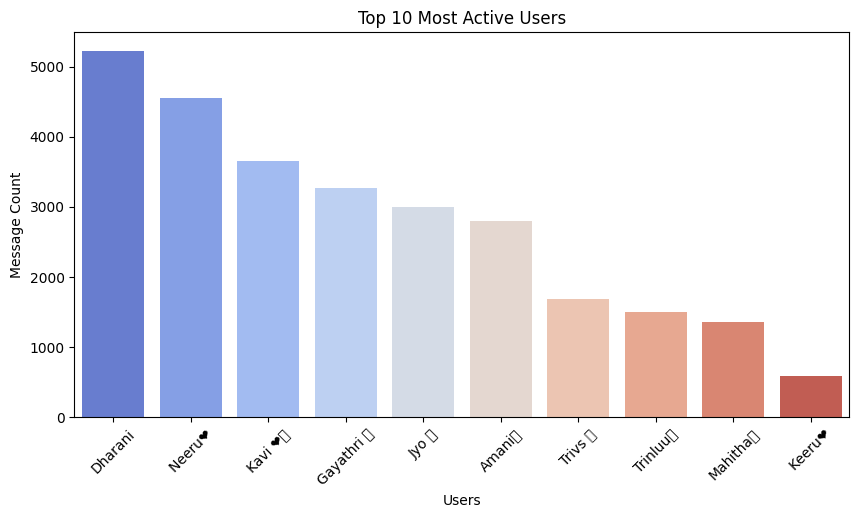

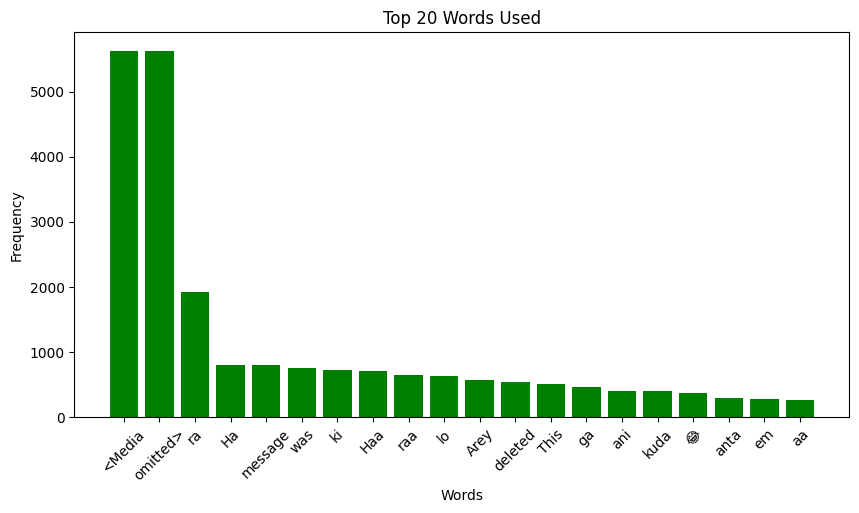

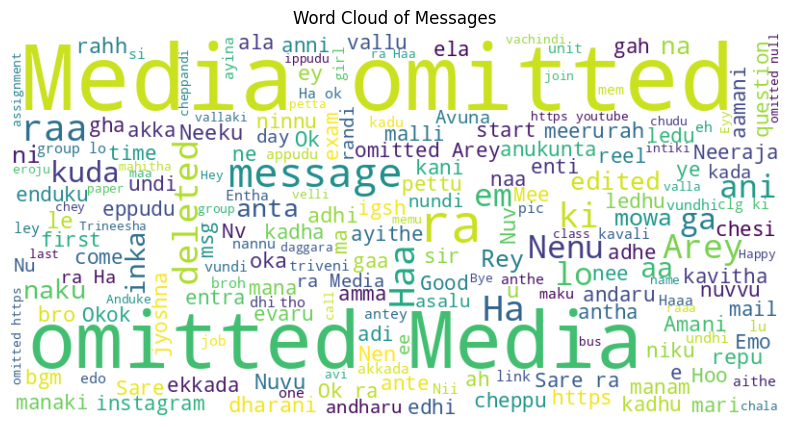

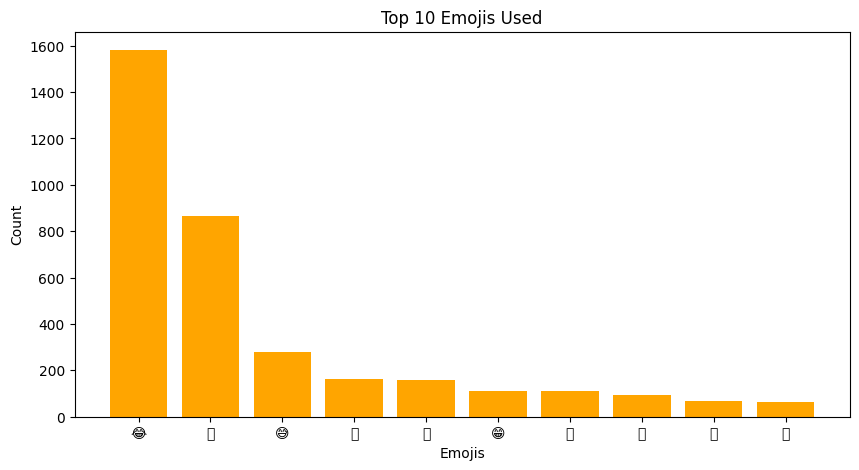

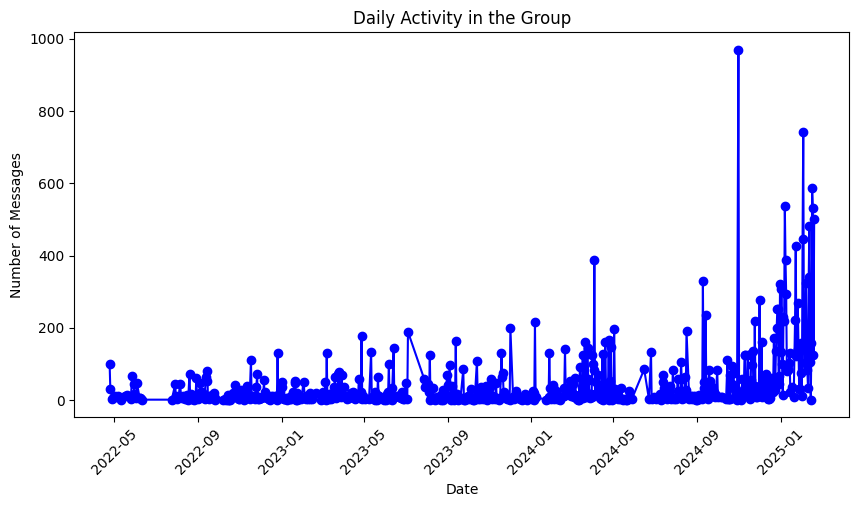

<ipython-input-2-98055d3db600>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")


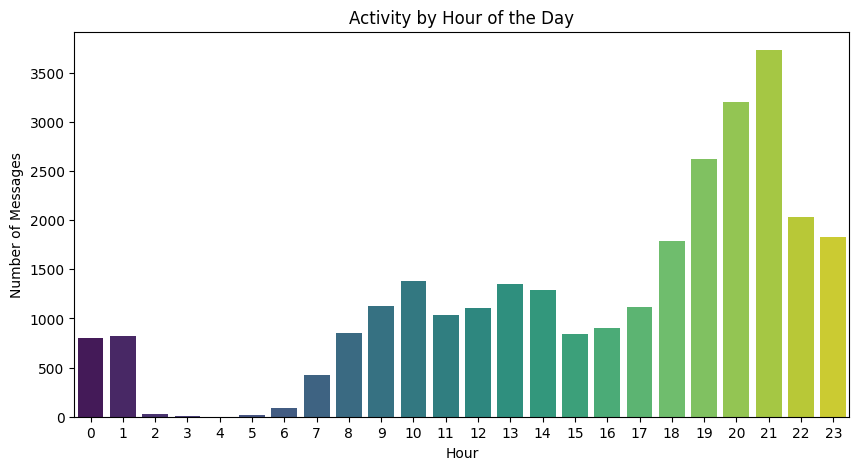

Total Media Files Sent: 5631
Total Links Shared: 313


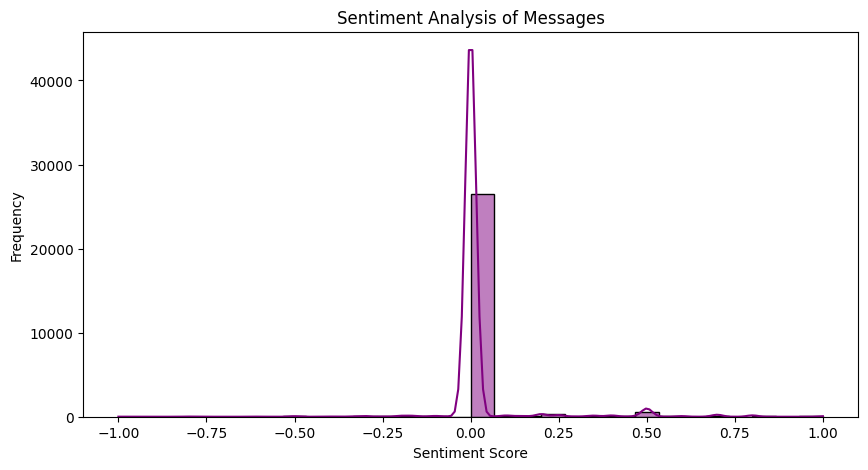

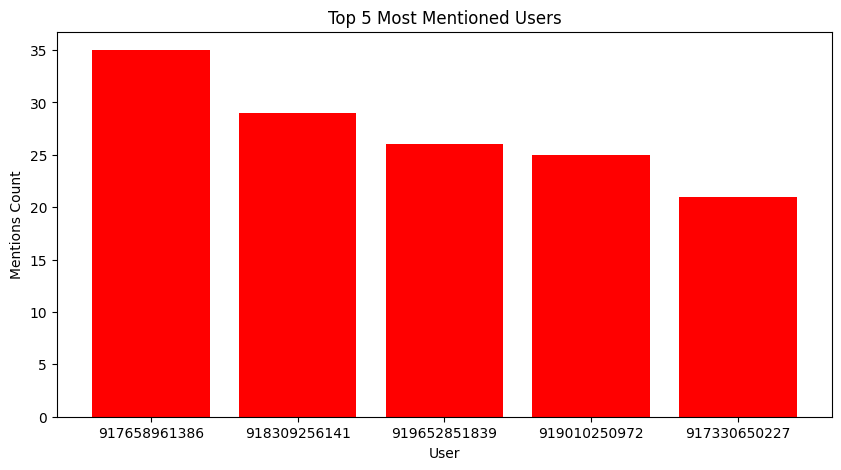

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import emoji
from wordcloud import WordCloud
from textblob import TextBlob
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load chat file
def load_chat(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# Parse messages
def parse_messages(chat_lines):
    pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[AP]?M?) - (.+?): (.*)'
    data = []

    for line in chat_lines:
        match = re.match(pattern, line)
        if match:
            date, time, user, message = match.groups()
            data.append([date, time, user, message])

    df = pd.DataFrame(data, columns=["Date", "Time", "User", "Message"])
    df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y", errors='coerce')

    return df

# Most active users
def most_active_users(df):
    user_counts = df['User'].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=user_counts.index[:10], y=user_counts.values[:10], hue=user_counts.index[:10], palette="coolwarm", legend=False)

    plt.title('Top 10 Most Active Users')
    plt.xlabel('Users')
    plt.ylabel('Message Count')
    plt.xticks(rotation=45)
    plt.show()

# Word frequency & word cloud
def word_analysis(df):
    words = ' '.join(df['Message']).split()
    word_counts = Counter(words)
    common_words = dict(word_counts.most_common(20))

    plt.figure(figsize=(10, 5))
    plt.bar(common_words.keys(), common_words.values(), color='green')
    plt.title('Top 20 Words Used')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Word Cloud of Messages')
    plt.show()

# Emoji analysis
def emoji_analysis(df):
    all_emojis = ''.join([c for c in ''.join(df['Message']) if c in emoji.EMOJI_DATA])
    emoji_counts = Counter(all_emojis)

    if emoji_counts:
        top_emojis = dict(emoji_counts.most_common(10))
        plt.figure(figsize=(10, 5))
        plt.bar(top_emojis.keys(), top_emojis.values(), color='orange')
        plt.title('Top 10 Emojis Used')
        plt.xlabel('Emojis')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No emojis found!")

# Daily activity analysis
def daily_activity(df):
    daily_counts = df.groupby(df['Date'].dt.date).count()['Message']
    plt.figure(figsize=(10, 5))
    daily_counts.plot(kind='line', marker='o', color='blue')
    plt.title('Daily Activity in the Group')
    plt.xlabel('Date')
    plt.ylabel('Number of Messages')
    plt.xticks(rotation=45)
    plt.show()

# Hourly activity analysis
def hourly_activity(df):
    df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour
    hourly_counts = df.groupby('Hour').count()['Message']

    plt.figure(figsize=(10, 5))
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
    plt.title('Activity by Hour of the Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Messages')
    plt.show()

# Media & links count
def media_and_links_count(df):
    media_count = df['Message'].str.contains('<Media omitted>', regex=False).sum()
    link_count = df['Message'].str.contains(r'http[s]?://', regex=True).sum()

    print(f"Total Media Files Sent: {media_count}")
    print(f"Total Links Shared: {link_count}")

# Sentiment analysis
def sentiment_analysis(df):
    def get_sentiment(text):
        return TextBlob(text).sentiment.polarity

    df['Sentiment'] = df['Message'].apply(get_sentiment)

    plt.figure(figsize=(10, 5))
    sns.histplot(df['Sentiment'], bins=30, kde=True, color="purple")
    plt.title("Sentiment Analysis of Messages")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()

# Most tagged users (@mentions)
def top_mentions(df):
    mentions = re.findall(r'@(\w+)', ' '.join(df['Message']))
    mention_counts = Counter(mentions)

    if mention_counts:
        top_mentions = dict(mention_counts.most_common(5))
        plt.figure(figsize=(10, 5))
        plt.bar(top_mentions.keys(), top_mentions.values(), color='red')
        plt.title('Top 5 Most Mentioned Users')
        plt.xlabel('User')
        plt.ylabel('Mentions Count')
        plt.show()
    else:
        print("No mentions found in the chat!")

# Main execution
if __name__ == "__main__":
    chat_lines = load_chat("/content/WhatsApp Chat with Hostlers of LNGH...❤‍🔥.txt")  # Replace with your file name
    df = parse_messages(chat_lines)

    print(df.head())  # Preview data

    most_active_users(df)
    word_analysis(df)
    emoji_analysis(df)
    daily_activity(df)
    hourly_activity(df)
    media_and_links_count(df)
    sentiment_analysis(df)
    top_mentions(df)